In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
import requests
import pandas as pd

def get_air_quality(city, start_date, end_date):
    url = f"https://api.openaq.org/v2/measurements"
    params = {
        'city': city,
        'date_from': start_date,
        'date_to': end_date,
        'limit': 10000,  # Adjust as needed
        'api_key': "f4006f414137ee1addf0a1aebf5f18926642a2a3ad8fc74347b54d48486d564f"
    }
    response = requests.get(url, params=params)
    data = response.json()

    if response.status_code == 200:
        return data
    else:
        return None

city = "Beijing"
start_date = "2022-01-01"  # Replace with your desired start date
end_date = "2023-01-01"    # Replace with your desired end date

air_quality_data = get_air_quality(city, start_date, end_date)

if air_quality_data:
    # Create a DataFrame from the 'results' field in the dictionary
    df = pd.json_normalize(air_quality_data['results'])
    # Visualize the DataFrame
    print(df)
else:
    print("Error retrieving air quality data.")


      locationId            location parameter  value   unit country  city  \
0             21  Beijing US Embassy      pm25   35.0  µg/m³      CN  None   
1             21  Beijing US Embassy      pm25   40.0  µg/m³      CN  None   
2             21  Beijing US Embassy      pm25   37.0  µg/m³      CN  None   
3             21  Beijing US Embassy      pm25   60.0  µg/m³      CN  None   
4             21  Beijing US Embassy      pm25   47.0  µg/m³      CN  None   
...          ...                 ...       ...    ...    ...     ...   ...   
8786          21  Beijing US Embassy      pm25    7.0  µg/m³      CN  None   
8787          21  Beijing US Embassy      pm25   16.0  µg/m³      CN  None   
8788          21  Beijing US Embassy      pm25   19.0  µg/m³      CN  None   
8789          21  Beijing US Embassy      pm25   23.0  µg/m³      CN  None   
8790          21  Beijing US Embassy      pm25    7.0  µg/m³      CN  None   

      isMobile isAnalysis                     entity       sens

In [102]:
# Create a dataframe from the 'results' field in the dictionary
df = pd.json_normalize(air_quality_data['results'])
#Vizualise the dataframe
df 

,locationId,location,parameter,value,unit,country,city,isMobile,isAnalysis,entity,sensorType,date.utc,date.local,coordinates.latitude,coordinates.longitude
0,21,Beijing US Embassy,pm25,35.0,µg/m³,CN,None,False,None,Governmental Organization,reference grade,2022-01-01T01:00:00+00:00,2022-01-01T09:00:00+08:00,39.95,116.47
1,21,Beijing US Embassy,pm25,40.0,µg/m³,CN,None,False,None,Governmental Organization,reference grade,2022-01-01T02:00:00+00:00,2022-01-01T10:00:00+08:00,39.95,116.47
2,21,Beijing US Embassy,pm25,37.0,µg/m³,CN,None,False,None,Governmental Organization,reference grade,2022-01-01T03:00:00+00:00,2022-01-01T11:00:00+08:00,39.95,116.47
3,21,Beijing US Embassy,pm25,60.0,µg/m³,CN,None,False,None,Governmental Organization,reference grade,2022-01-01T04:00:00+00:00,2022-01-01T12:00:00+08:00,39.95,116.47
4,21,Beijing US Embassy,pm25,47.0,µg/m³,CN,None,False,None,Governmental Organization,reference grade,2022-01-01T05:00:00+00:00,2022-01-01T13:00:00+08:00,39.95,116.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8786,21,Beijing US Embassy,pm25,7.0,µg/m³,CN,None,False,None,Governmental Organization,reference grade,2022-12-28T04:00:00+00:00,2022-12-28T12:00:00+08:00,39.95,116.47
8787,21,Beijing US Embassy,pm25,16.0,µg/m³,CN,None,False,None,Governmental Organization,reference grade,2022-12-28T06:00:00+00:00,2022-12-28T14:00:00+08:00,39.95,116.47
8788,21,Beijing US Embassy,pm25,19.0,µg/m³,CN,None,False,None,Governmental Organization,reference grade,2022-12-28T07:00:00+00:00,2022-12-28T15:00:00+08:00,39.95,116.47
8789,21,Beijing US Embassy,pm25,23.0,µg/m³,CN,None,False,None,Governmental Organization,reference grade,2022-12-28T08:00:00+00:00,2022-12-28T16:00:00+08:00,39.95,116.47


Now we make the time column as the index column

In [103]:
df.set_index('date.utc', inplace=True)

In [104]:
df.columns

Index(['locationId', 'location', 'parameter', 'value', 'unit', 'country',
       'city', 'isMobile', 'isAnalysis', 'entity', 'sensorType', 'date.local',
       'coordinates.latitude', 'coordinates.longitude'],
      dtype='object')

We delete the column of date.local and all the columns that we don't need. <br>
We need just the time variable and the value of the prameter pm25.

In [105]:
df = df.drop(['locationId', 'location', 'parameter', 'unit', 'country',
       'city', 'isMobile', 'isAnalysis', 'entity', 'sensorType', 'date.local',
       'coordinates.latitude', 'coordinates.longitude'], axis=1)

In [106]:
df.head()

,value
date.utc,
2022-01-01T01:00:00+00:00,35.0
2022-01-01T02:00:00+00:00,40.0
2022-01-01T03:00:00+00:00,37.0
2022-01-01T04:00:00+00:00,60.0
2022-01-01T05:00:00+00:00,47.0


Convert the index to Date Time

In [107]:
df.index = pd.to_datetime(df.index)

In [108]:
#sort the index
df = df.sort_index()

The dataframe is so big, it contains many records at the same day. So let's make it just one record per day, we pick the max of the records.

In [109]:
# Group by date and select the maximum value for each day
df_daily = df.resample('D').max()

In [110]:
df_daily.head()

,value
date.utc,
2022-01-01 00:00:00+00:00,60.0
2022-01-02 00:00:00+00:00,29.0
2022-01-03 00:00:00+00:00,44.0
2022-01-04 00:00:00+00:00,66.0
2022-01-05 00:00:00+00:00,83.0


In [111]:
df_daily.shape

(366, 1)

We can see that our dataframe has been reduced.

Let’s format our visualization using Seaborn:

In [112]:
sns.set()

And label the y-axis and x-axis using Matplotlib. We will also rotate the dates on the x-axis so that they’re easier to read

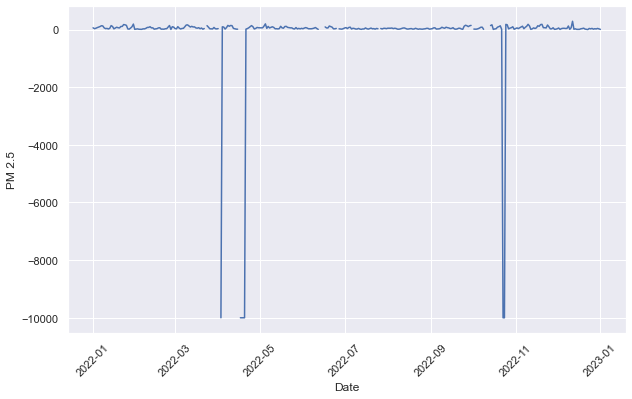

In [113]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.ylabel('PM 2.5')
plt.xlabel('Date')
plt.xticks(rotation=45)
#And finally, generate our plot with Matplotlib
plt.plot(df_daily.index, df_daily['value'], )

We can see the existance of many outliers, so we need to replace them.

In [114]:
# Calculate median and interquartile range (IQR)
median = df_daily['value'].median()
Q1 = df_daily['value'].quantile(0.25)
Q3 = df_daily['value'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier threshold
outlier_threshold = 1.5

# Replace outliers with the median
df_daily.loc[(df_daily['value'] < Q1 - outlier_threshold * IQR) | (df_daily['value'] > Q3 + outlier_threshold * IQR), 'value'] = median

In [ ]:
# Create a boxplot after replacing outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df_daily['value'], vert=False)
plt.xlabel('Value')
plt.title('Boxplot of Values with Replaced Outliers')
plt.show()

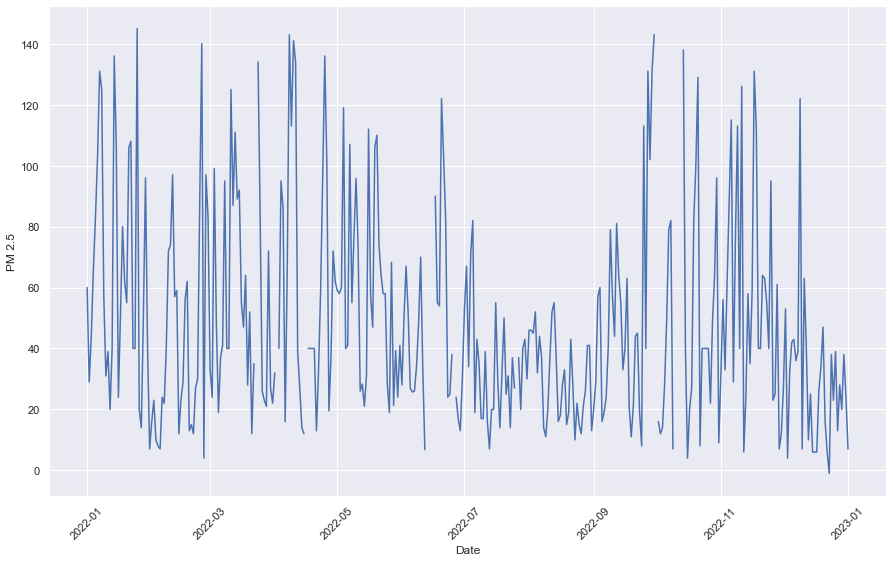

In [116]:
plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
plt.ylabel('PM 2.5')
plt.xlabel('Date')
plt.xticks(rotation=45)
#And finally, generate our plot with Matplotlib
plt.plot(df_daily.index, df_daily['value'], )

We see that there is missing values using the the ffill() method (fill forward) used for time series to fill missing data

In [126]:
# Resample to daily frequency and forward-fill missing values
df_daily = df_daily.ffill()

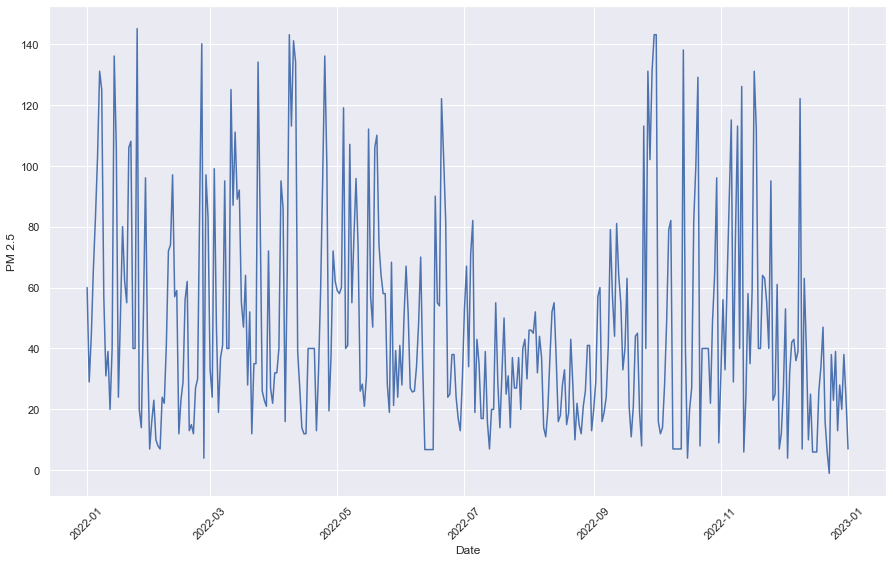

In [127]:
plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
plt.ylabel('PM 2.5')
plt.xlabel('Date')
plt.xticks(rotation=45)
#And finally, generate our plot with Matplotlib
plt.plot(df_daily.index, df_daily['value'], )

Now we can see our serie very clear.

### Splitting the data for training and testing

An important part of model building is splitting our data for training and testing, which ensures that you build a model that can generalize outside of the training data and that the performance and outputs are statistically meaningful. <br><br>
We will split our data such that everything before July 2023 will serve as training data, with everything after that becoming the testing data:

In [128]:
train = df_daily[df_daily.index < pd.to_datetime("2022-11-01T01:00:00+00:00")]
test = df_daily[df_daily.index >= pd.to_datetime("2022-11-01T01:00:00+00:00")]

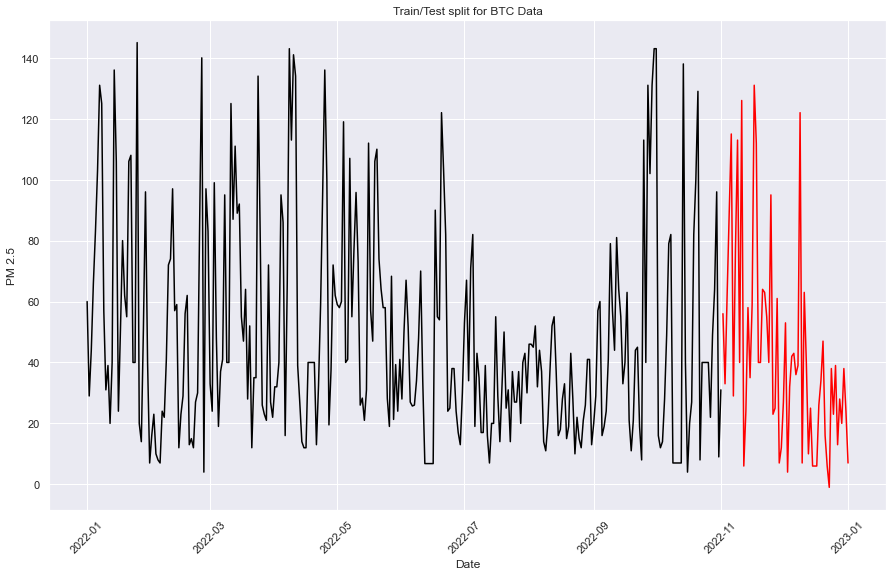

In [129]:
plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('PM 2.5')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

# Autoregressive Moving Average (ARMA)

The term “autoregressive” in ARMA means that the model uses past values to predict future ones. Specifically, predicted values are a weighted linear combination of past values. This type of regression method is similar to linear regression, with the difference being that the feature inputs here are historical values. <br>

Moving average refers to the predictions being represented by a weighted, linear combination of white noise terms, where white noise is a random signal. The idea here is that ARMA uses a combination of past values and white noise in order to predict future values. Autoregression models market participant behavior like buying and selling BTC. The white noise models shock events like wars, recessions and political events. 

We can access the ARIMA using the SARIMAX package

In [143]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

We define the input

In [144]:
y = train['value']

And then let’s define our model. To define an ARMA model with the SARIMAX class, we pass in the order parameters of (1, 0 ,1). Alpha corresponds to the significance level of our predictions. Typically, we choose an alpha = 0.05. Here, the ARIMA algorithm calculates upper and lower bounds around the prediction such that there is a 5 percent chance that the real value will be outside of the upper and lower bounds. This means that there is a 95 percent confidence that the real value will be between the upper and lower bounds of our predictions.

In [145]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

We can then fit our model now

In [146]:
ARMAmodel = ARMAmodel.fit()

Generate our predictions

In [147]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_ARMA = y_pred_df["Predictions"] 

C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


And plot the results:

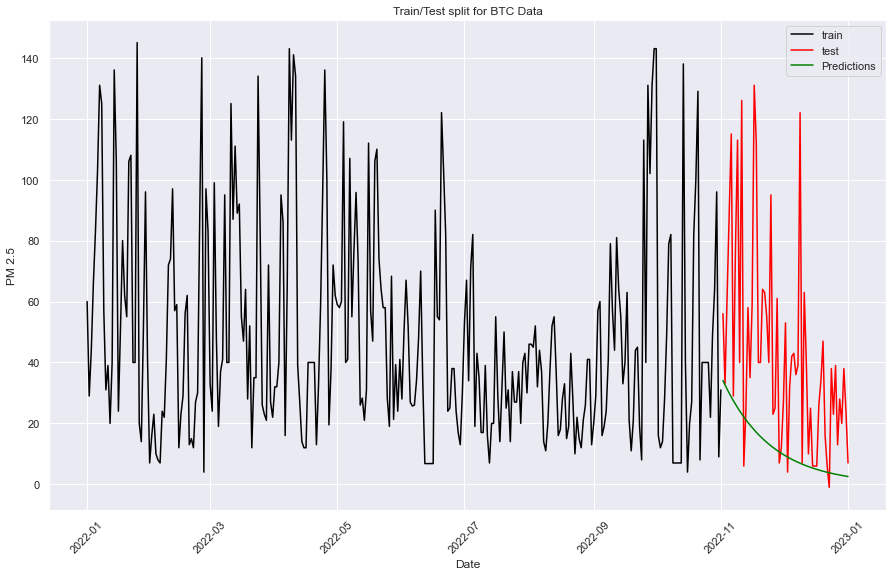

In [148]:
plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
plt.plot(train, color = "black", label = 'train')
plt.plot(test, color = "red", label = 'test')
plt.ylabel('PM 2.5')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions')
plt.legend()
plt.show()

We can also evaluate the performance using the root mean-squared error:

In [149]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  42.58577165200987


The RMSE is little bit high, which we could have guessed upon inspecting the plot. The model predicts a decrease which is the case, but it still needs a lot to get the real result. Again, ARMA is limited in that it fails for non-stationary time series and does not capture seasonality. Let’s see if we can improve performance with an ARIMA model.

# Autoregressive Integrated Moving Average (ARIMA)

Let’s import the ARIMA package from the stats library

In [150]:
from statsmodels.tsa.arima.model import ARIMA

An ARIMA task has three parameters. The first parameter corresponds to the lagging (past values), the second corresponds to differencing (this is what makes non-stationary data stationary), and the last parameter corresponds to the white noise (for modeling shock events). <br>

Let’s define an ARIMA model with order parameters (2,2,2):

C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


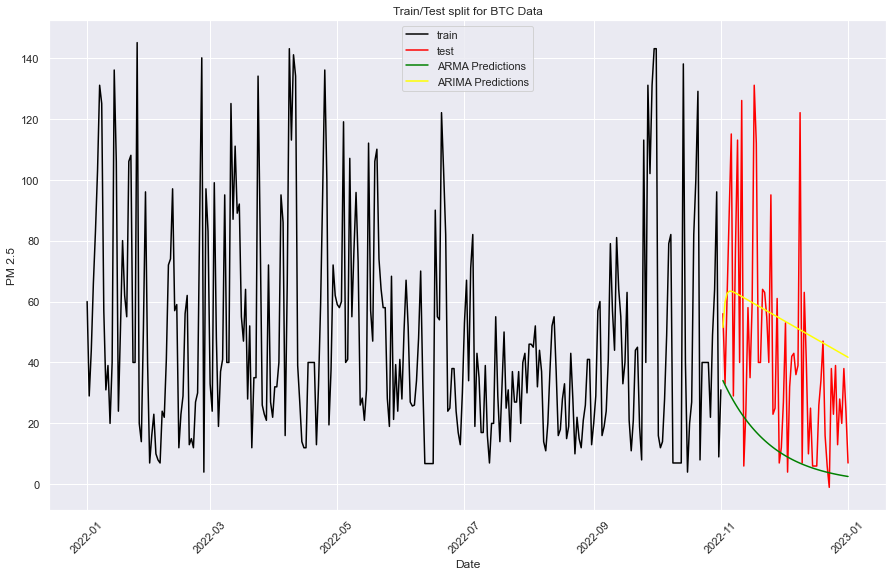

In [151]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_ARIMA = y_pred_df["Predictions"] 

plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
plt.plot(train, color = "black", label = 'train')
plt.plot(test, color = "red", label = 'test')
plt.ylabel('PM 2.5')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

In [153]:
arma_rmse = np.sqrt(mean_squared_error(test["value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  31.868877995767306


We see that the ARIMA predictions (in yellow) fall on top of the ARMA predictions and also the RMSE decreases. Let’s try increasing the differencing parameter to ARIMA (2,3,2):

C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


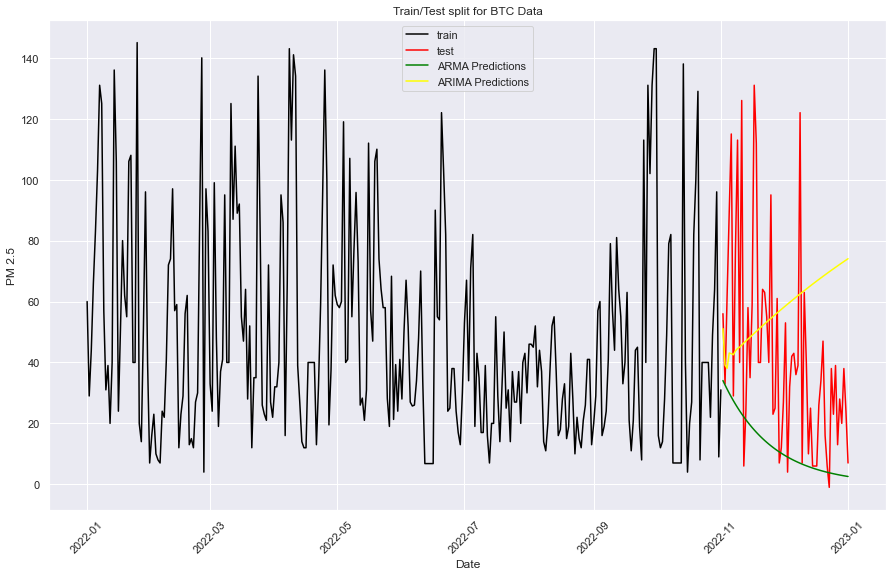

In [154]:
ARIMAmodel = ARIMA(y, order = (2, 3, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_ARIMA = y_pred_df["Predictions"] 

plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
plt.plot(train, color = "black", label = 'train')
plt.plot(test, color = "red", label = 'test')
plt.ylabel('PM 2.5')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

We see this helps capture the increasing price direction. Let’s try playing with the parameters even further with ARIMA(8,2,3):

C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


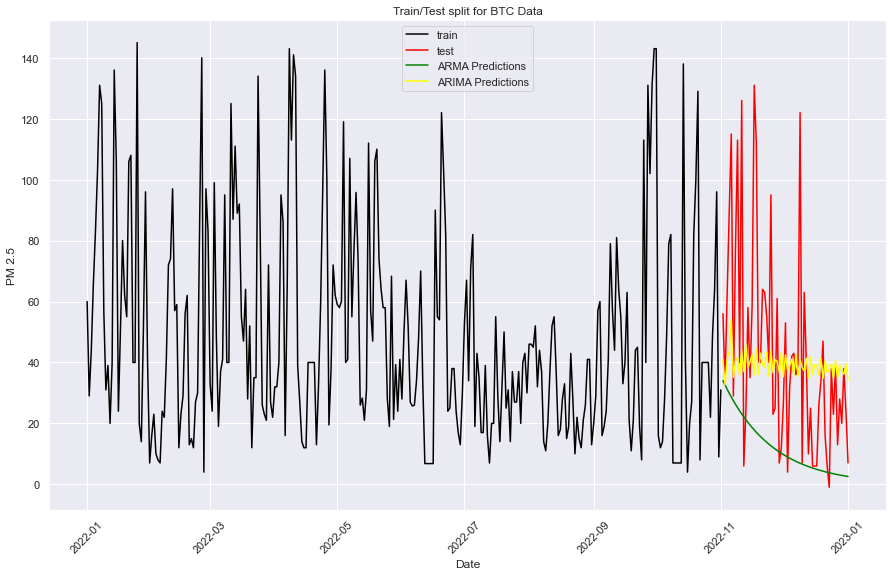

In [182]:
ARIMAmodel = ARIMA(y, order = (8, 2, 3))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_ARIMA = y_pred_df["Predictions"] 

plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
plt.plot(train, color = "black", label = 'train')
plt.plot(test, color = "red", label = 'test')
plt.ylabel('PM 2.5')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

In [183]:
arma_rmse = np.sqrt(mean_squared_error(test["value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  31.661690996339107


And we have an RMSE of 31.66, which is better than ARMA. Another approach is to train a linear regression model on temporal features such as week, month, and year. This approach is limited since it does not capture autoregressive and moving average features like the ARIMA method. Further, ARIMA trains regressors on detrended lagged target values as opposed to independent variables like linear regression. With this being said ARIMA would likely outperform a linear regression model trained on independent temporal variables. <br>

Finally, let’s see if SARIMA, which incorporates seasonality, will further improve performance. 

# Seasonal ARIMA (SARIMA)

Seasonal ARIMA captures historical values, shock events and seasonality. We can define a SARIMA model using the SARIMAX class:

In [184]:
SARIMAXmodel = SARIMAX(y, order = (8, 2, 3), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [185]:

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out_SARIMA = y_pred_df["Predictions"] 

C:\Users\Noureddine\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


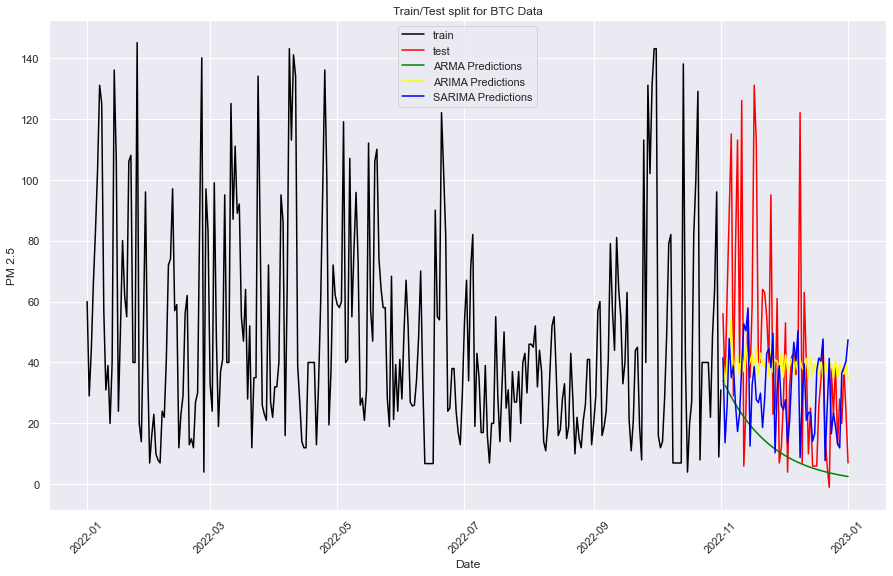

In [186]:
plt.figure(figsize=(15, 9))  # Adjust the figure size as needed
plt.plot(train, color = "black", label = 'train')
plt.plot(test, color = "red", label = 'test')
plt.ylabel('PM 2.5')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_SARIMA, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

In [187]:
arma_rmse = np.sqrt(mean_squared_error(test["value"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  36.608234455275706


Here we have an RMSE of 36.61, which is slightly worse than ARIMA. This may be due to lack of hyperparameter tuning. If we play around with the parameters for our SARIMA model we should be able to improve performance even further. 